# Praca domowa 7+8

1. W projekcie 2, analizując dane z diagnozy społecznej, zrobiłam wykresy przedstawiające zależność między wiekiem a liczbą osób, które wybierają daną wartość za najważniejszą w swoim życiu. Dla roku 2015 jednym z wykresów był ten:

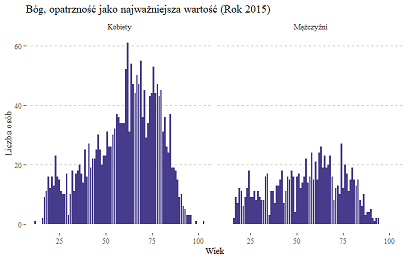

Jako nowy wykres zaproponowałam ten poniżej. Jest on stworzony dla jednej spośród wybieranych wartości - pieniędzy, lecz na jednym wykresie można odnaleźć więcej informacji. Płeć nie jest rozdzielona na dwa wykresy, ale zaznaczona kolorami, a jeśli potrzeba nam konkretnych liczb, to można "najechać" na odpowiedni słupek i odczytać z niego interesujące nas szczegóły. Ponieważ w naszym projekcie skupiliśmy się także na analizowaniu wykształcenia społeczeństwa, to dodatkowo dodałam tu opcję możliwości wyboru poziomu wykształcenia i badania zależności między nim a liczbą osób, które wybierają pieniądze jako jedną z najważniejszych wartości w życiu. Ponieważ różnice te w poszzególnych grupach wykształcenia są dość duże, to warto przy zmienianiu grupy zmienić także zakres osi Y, co jednak nie stanowi żadnego problemu, a znacznie ułatwia szczegółową analizę.

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd

#!pip install pyreadstat

df = pd.read_spss("ds_0_15_ind_14112015.sav")

sel = df[["wiek2015","PLEC_ALL","HP2_01","HP2_02","HP2_03","HP2_04","HP2_05","HP2_06","HP2_07","HP2_08","HP2_09","HP2_10","HP2_11","HP2_11","HP2_12","HP2_13","HP65", "KLASA_MIEJSCOWOSCI","HC16"]]

sel_1 = sel[sel["HP2_06"]=="TAK"][["wiek2015","PLEC_ALL", "HC16","HP65"]].groupby(["wiek2015","PLEC_ALL","HC16"]).size().reset_index().rename(columns={0:"n"})


fig = px.bar(
    data_frame = sel_1,
    x = "wiek2015",
    y = "n",
    color = "PLEC_ALL",
    animation_frame = "HC16",
    labels = {
        "wiek2015": "Wiek",
        "n": "Liczba osób"
    },
    title = "Bóg, opatrzność jako najważniejsza wartość (Rok 2015)",
    range_y=[0,50]
)

fig.show()

2. Jednym z wykresów w naszym projekcie 2 był także średni miesięczny dochód w zależności od klasy miejscowości:

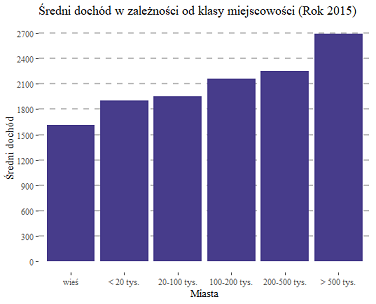

Powyższy wykres jest bardzo prosty, w nowej wersji dodałam opcję wyboru wieku i zamiast liczyć średnie i przedstawiać to na wykresie słupkowym, to stworzyłam wykres punktowy, który przedstawia więcej szczegółów, tym bardziej, że jest możliwość odczytania pojedynczych wartości dzięki z każdego punktu.

In [ ]:
sel_d = sel[["HP65","KLASA_MIEJSCOWOSCI","wiek2015"]]
sel_dd = sel_d[sel_d["HP65"].isnull()==False]
sel_ddd = sel_dd[sel_dd["KLASA_MIEJSCOWOSCI"].isnull()==False]
sel_dddd = sel_ddd[sel_ddd["wiek2015"].isnull()==False].sort_values("wiek2015")
selected = sel_dddd[sel_dddd["wiek2015"]>17]

fig2 = px.scatter(
    data_frame = selected,
    x = "KLASA_MIEJSCOWOSCI",
    y = "HP65",
    animation_frame = "wiek2015",
    labels = {
        "KLASA_MIEJSCOWOSCI": "Klasa miejscowości",
        "HP65": "Miesięczny dochód"
    },
    title = "Miesięczny dochód w zależności od klasy miejscowości (Rok 2015)",
    range_y=[0,8000]
)
fig2.show()